In [10]:
import requests
from pprint import pprint
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [11]:
with open('geokey') as f:
    key = f.read().strip()

In [12]:
url = "https://api.foursquare.com/v3/places/search"

In [13]:
headers = {
    "Accept": "application/json",
    "Authorization": key
}

In [14]:
params = {
    "query": "coffee",
    "ll": "51.117045,17.001045",
    "open_now": "true",
    "sort": "DISTANCE",
    "limit": 2
}

In [15]:
response = requests.request("GET", url, params=params, headers=headers)
pprint(response.json())

{'context': {'geo_bounds': {'circle': {'center': {'latitude': 51.117045,
                                                  'longitude': 17.001045},
                                       'radius': 22000}}},
 'results': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/hotdog_',
                                       'suffix': '.png'},
                              'id': 13058,
                              'name': 'Hot Dog Joint',
                              'plural_name': 'Hot Dog Joints',
                              'short_name': 'Hot Dogs'},
                             {'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
                                       'suffix': '.png'},
                              'id': 13034,
                              'name': 'Café',
                              'plural_name': 'Cafés',
                              'short_name': 'Café'}],
              'chains': [],
              'closed_bucket

In [16]:
data = {
    'categories': [
        {
            'name': 'Hot Dog Joint',
            'location': {'latitude': 51.11788, 'longitude': 17.000108},
            'address': 'Słubicka 18, 53-615 Wrocław',
            'formatted_address': 'Słubicka 18, 53-615 Wrocław'
        },
        {
            'name': 'Coffee Shop',
            'location': {'latitude': 51.112956, 'longitude': 17.00083},
            'address': 'Strzegomska 3b-3c, 53-611 Wrocław',
            'formatted_address': 'Strzegomska 3b-3c, 53-611 Wrocław'
        }
    ]
}

geometry = [Point(lon, lat) for lat, lon in zip(
    [point['location']['latitude'] for point in data['categories']],
    [point['location']['longitude'] for point in data['categories']]
)]

geo_df = gpd.GeoDataFrame(data['categories'], geometry=geometry)

In [17]:
geo_df.head()

,name,location,address,formatted_address,geometry
0,Hot Dog Joint,"{'latitude': 51.11788, 'longitude': 17.000108}","Słubicka 18, 53-615 Wrocław","Słubicka 18, 53-615 Wrocław",POINT (17.00011 51.11788)
1,Coffee Shop,"{'latitude': 51.112956, 'longitude': 17.00083}","Strzegomska 3b-3c, 53-611 Wrocław","Strzegomska 3b-3c, 53-611 Wrocław",POINT (17.00083 51.11296)


In [18]:
geo_df.explore()

In [19]:
countries = gpd.read_file("data/ne_110m_admin_0_countries.zip")

In [20]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


<Axes: >

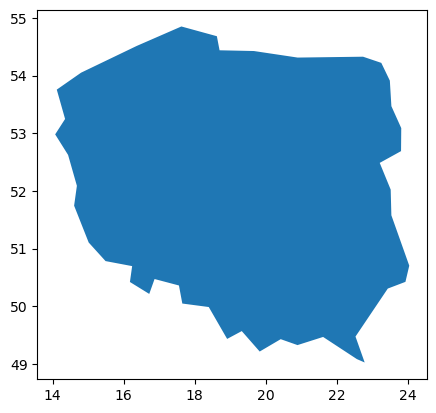

In [21]:
# leave only poland
countries = countries[countries['name'] == 'Poland']
countries.plot()

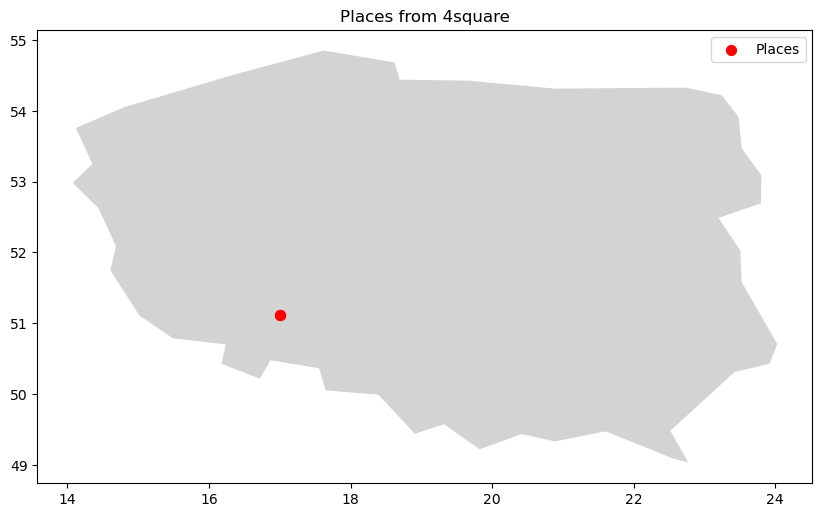

In [23]:
# add points to map
fig, ax = plt.subplots(figsize=(10, 6))
countries.plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, markersize=50, color='red', marker='o', label='Places')
plt.title('Places from 4square')
plt.legend()
plt.show()

/var/folders/06/3kkbb_xs2lv1lyxjjvq855fh0000gn/T/ipykernel_19047/3490013074.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


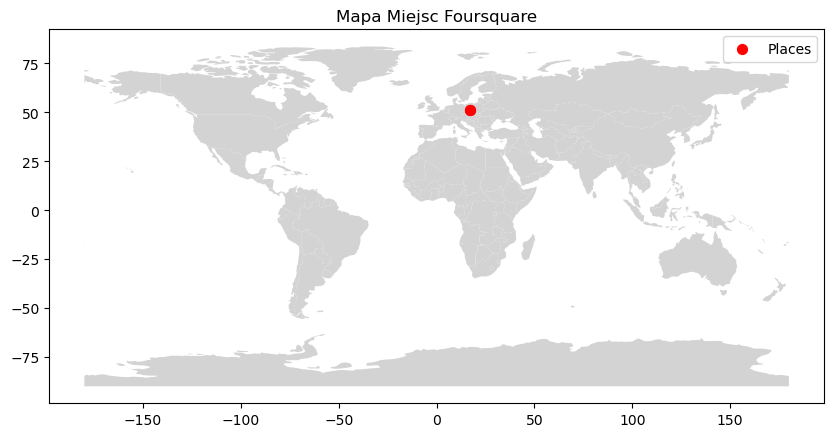

In [24]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, markersize=50, color='red', marker='o', label='Places')
plt.title('Mapa Miejsc Foursquare')
plt.legend()
plt.show()